In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
df=pd.read_csv(r"C:\Users\91861\Desktop\Artifical Intelligence\Machine Leraning\POLINOMIAL_REGRESSION\Weight_Height_Polynomial_Dataset.csv")

In [3]:
df.head()

,Weight,Height
0,69.963210,96.644532
1,116.057145,196.156340
2,98.559515,145.862047
3,87.892679,121.157923
4,52.481491,68.971292


In [4]:
df.describe()

,Weight,Height
count,50.000000,50.000000
mean,75.673912,111.473633
std,23.110656,39.493803
min,41.646760,68.971292
25%,54.701360,79.966731
50%,74.883900,98.819101
75%,91.988395,129.709758
max,117.592788,202.663424


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  50 non-null     float64
 1   Height  50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


In [6]:
x=df.iloc[:,0]
y= df.iloc[:,1]

In [7]:
x.head()

0     69.963210
1    116.057145
2     98.559515
3     87.892679
4     52.481491
Name: Weight, dtype: float64

In [8]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
X_test.head()

36    64.369102
47    81.605442
28    87.393166
9     96.645806
13    56.987129
Name: Weight, dtype: float64

In [10]:
X_train = X_train.to_frame()
X_test = X_test.to_frame()

In [11]:
X_test.head()

,Weight
36,64.369102
47,81.605442
28,87.393166
9,96.645806
13,56.987129


In [12]:
X_train.head()


,Weight
24,76.485599
48,83.736822
17,81.980515
12,106.595411
27,81.138755


In [13]:
lr = LinearRegression ()

In [14]:
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred=lr.predict(X_test)

In [16]:
print("MAE :",mean_absolute_error(y_test,y_pred))
print("MSE :",mean_squared_error(y_test,y_pred))
print("r2_score :",r2_score(y_test,y_pred))

MAE : 10.559542888737889
MSE : 147.84170914265454
r2_score : 0.5181986924754776


Text(0, 0.5, 'Height')

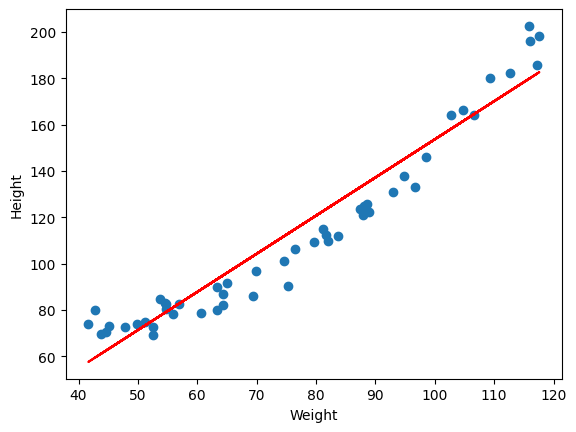

In [17]:
plt.scatter(df['Weight'],df['Height'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('Weight')
plt.ylabel('Height')

In [18]:
#----------------

In [19]:
x=df.iloc[:,0]
y= df.iloc[:,1]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
X_train = X_train.to_frame()
X_test = X_test.to_frame()

In [22]:
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lr', LinearRegression())
])

In [23]:
model.fit(X_train,y_train)


Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('lr', LinearRegression())])

In [24]:
y_pred = model.predict(X_test)


In [25]:
print("MAE :",mean_absolute_error(y_test,y_pred))
print("MSE :",mean_squared_error(y_test,y_pred))
print("r2_score :",r2_score(y_test,y_pred))

MAE : 4.297374492384471
MSE : 30.064608690869484
r2_score : 0.9020224545463209


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


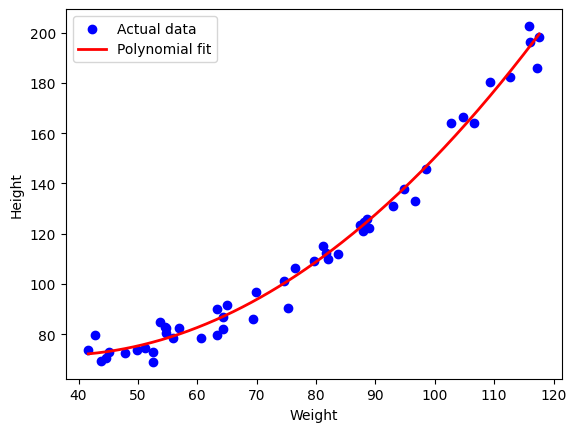

In [30]:
X_curve = np.linspace(
    df['Weight'].min(),
    df['Weight'].max(),
    200
).reshape(-1, 1)



y_curve = model.predict(X_curve)


plt.scatter(df['Weight'], df['Height'], color='blue', label='Actual data')
plt.plot(X_curve, y_curve, color='red', linewidth=2, label='Polynomial fit')

plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()


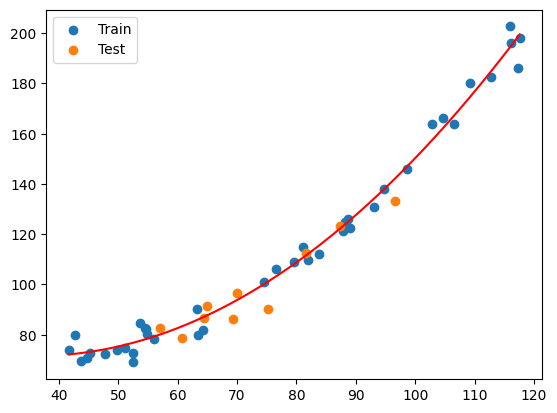

In [34]:
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')
plt.plot(X_curve, y_curve, color='red')
plt.legend()
plt.show()
